In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [11]:
# Tentukan ukuran grid gudang (misalnya, 5x5)
warehouse_rows = 5
warehouse_columns = 5

# Definisikan lokasi barang dan lokasi pengemasan
item_locations = [(0, 0), (0, 4), (4, 0), (4, 4)]
packing_location = (2, 2)

# Definisikan tindakan yang mungkin (0: up, 1: right, 2: down, 3: left)
actions = [0, 1, 2, 3]

In [12]:
# Langkah 2: Inisialisasi Q-table
q_table = np.zeros((warehouse_rows, warehouse_columns, len(actions)))
print(q_table[:,:,0])

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [13]:
# Langkah 3: Definisikan Parameter Q-learning
alpha = 0.1  # Learning rate
gamma = 0.6  # Discount factor
epsilon = 0.1  # Exploration rate

# Fungsi untuk memilih tindakan berdasarkan epsilon-greedy policy
def choose_action(state):
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice(actions)
    else:
        action = np.argmax(q_table[state[0], state[1]])
    return action

# Fungsi untuk menentukan reward
def get_reward(state):
    if state == packing_location:
        return 10
    elif state in item_locations:
        return 1
    else:
        return -1

# Fungsi untuk mengambil tindakan dan mendapatkan status berikutnya
def take_action(state, action):
    if action == 0 and state[0] > 0:
        next_state = (state[0] - 1, state[1])
    elif action == 1 and state[1] < warehouse_columns - 1:
        next_state = (state[0], state[1] + 1)
    elif action == 2 and state[0] < warehouse_rows - 1:
        next_state = (state[0] + 1, state[1])
    elif action == 3 and state[1] > 0:
        next_state = (state[0], state[1] - 1)
    else:
        next_state = state
    return next_state

In [14]:
# Langkah 4: Implementasi Algoritma Q-learning
def q_learning(episodes):
    for episode in range(episodes):
        state = (np.random.randint(0, warehouse_rows), np.random.randint(0, warehouse_columns))
        done = False

        while not done:
            action = choose_action(state)
            next_state = take_action(state, action)
            reward = get_reward(next_state)
            old_value = q_table[state[0], state[1], action]
            next_max = np.max(q_table[next_state[0], next_state[1]])

            # Q-learning update rule
            new_value = old_value + alpha * (reward + gamma * next_max - old_value)
            q_table[state[0], state[1], action] = new_value

            state = next_state
            if state == packing_location:
                done = True


In [15]:
# Langkah 5: Pelatihan dan Evaluasi Model
q_learning(1000)
print("Q-table setelah pelatihan:")
print(q_table)

Q-table setelah pelatihan:
[[[ 2.50000000e+00  8.32408998e-01  5.00000000e-01  2.50000000e+00]
  [ 5.34289832e-01  3.33870032e+00  2.38206598e+00  2.50000000e+00]
  [ 7.94495266e-01  5.29337484e-01  7.38743643e+00  3.77354147e-01]
  [ 5.38267906e-01  2.50000000e+00  3.41547821e+00  2.04259916e+00]
  [ 2.50000000e+00  2.50000000e+00  5.00000000e-01  9.72949496e-01]]

 [[ 2.50000000e+00  2.36166441e+00  9.75978406e-01  4.83920952e-01]
  [ 1.20828349e-01  7.19339684e+00  9.54382383e-01  1.52346195e-01]
  [ 9.80066534e-01  1.41809878e+00  1.40946746e+01  1.69734009e+00]
  [ 3.39214353e-01  5.00000000e-01  7.44912356e+00  9.07188538e-01]
  [ 2.50000000e+00  4.99999995e-01  1.71448675e+00  2.46045432e+00]]

 [[ 4.97269121e-01  7.27820157e+00  1.40000000e-02 -9.08592283e-02]
  [ 7.75787953e-01  1.40528204e+01  1.41360494e+00  5.43662034e-01]
  [ 6.88353193e+00  0.00000000e+00  0.00000000e+00  5.64964295e-01]
  [ 2.60678813e+00  1.37037831e+00  1.43058169e+00  1.41281601e+01]
  [ 5.00000000e-0

In [16]:
# Langkah 6: Visualisasi Hasil
def plot_policy(q_table):
    policy = np.argmax(q_table, axis=2)
    policy_symbols = np.full((warehouse_rows, warehouse_columns), ' ')
    for i in range(warehouse_rows):
        for j in range(warehouse_columns):
            if (i, j) == packing_location:
                policy_symbols[i, j] = 'P'
            elif (i, j) in item_locations:
                policy_symbols[i, j] = 'I'
            else:
                if policy[i, j] == 0:
                    policy_symbols[i, j] = '↑'
                elif policy[i, j] == 1:
                    policy_symbols[i, j] = '→'
                elif policy[i, j] == 2:
                    policy_symbols[i, j] = '↓'
                elif policy[i, j] == 3:
                    policy_symbols[i, j] = '←'

    print("Policy Grid:")
    print(policy_symbols)

plot_policy(q_table)

Policy Grid:
[['I' '→' '↓' '↓' 'I']
 ['↑' '→' '↓' '↓' '↑']
 ['→' '→' 'P' '←' '←']
 ['→' '→' '↑' '↑' '↓']
 ['I' '←' '↑' '↑' 'I']]


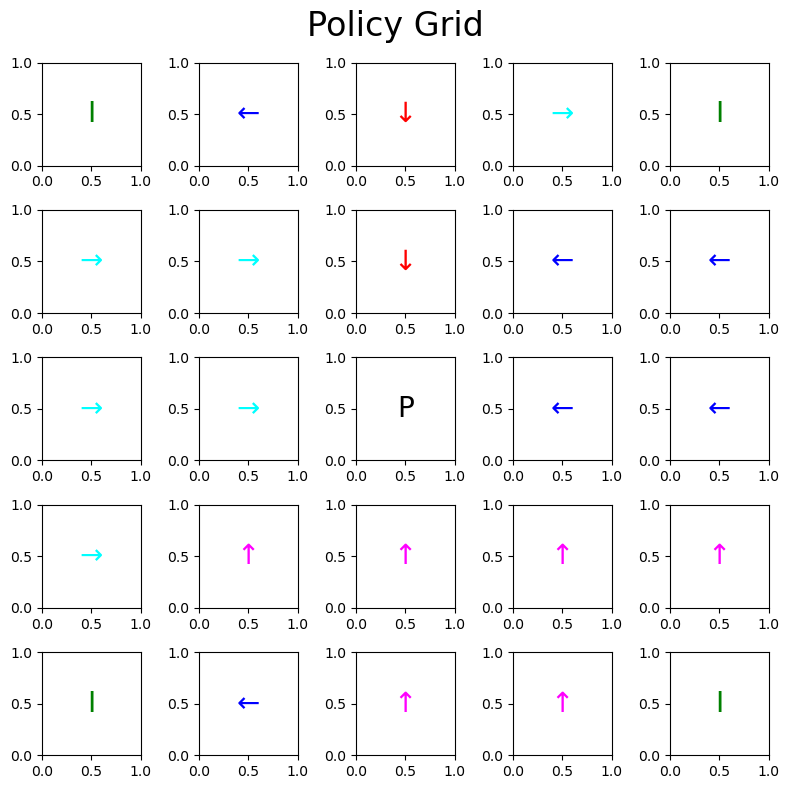

In [17]:
import matplotlib.pyplot as plt  # Import library at the beginning

policy_grid = [
    ['I', '←', '↓', '→', 'I'],
    ['→', '→', '↓', '←', '←'],
    ['→', '→', 'P', '←', '←'],
    ['→', '↑', '↑', '↑', '↑'],
    ['I', '←', '↑', '↑', 'I']]

colors = {
    'I': 'green',  # Item
    '←': 'blue',  # Left
    '↓': 'red',  # Down
    '→': 'cyan',  # Right
    '↑': 'magenta',  # Up
    'P': 'black'  # Agent's Position
}

# Create a 2D grid of subplots
fig, axs = plt.subplots(len(policy_grid), len(policy_grid[0]), figsize=(8, 8))

# Fill the subplots with symbols and colors
for row_idx, row in enumerate(policy_grid):
    for col_idx, symbol in enumerate(row):
        axs[row_idx, col_idx].text(0.5, 0.5, symbol, ha='center', va='center', fontsize=20, color=colors[symbol])

# Set title
plt.suptitle('Policy Grid', fontsize=24)

# Show the plot
plt.tight_layout()
plt.show()

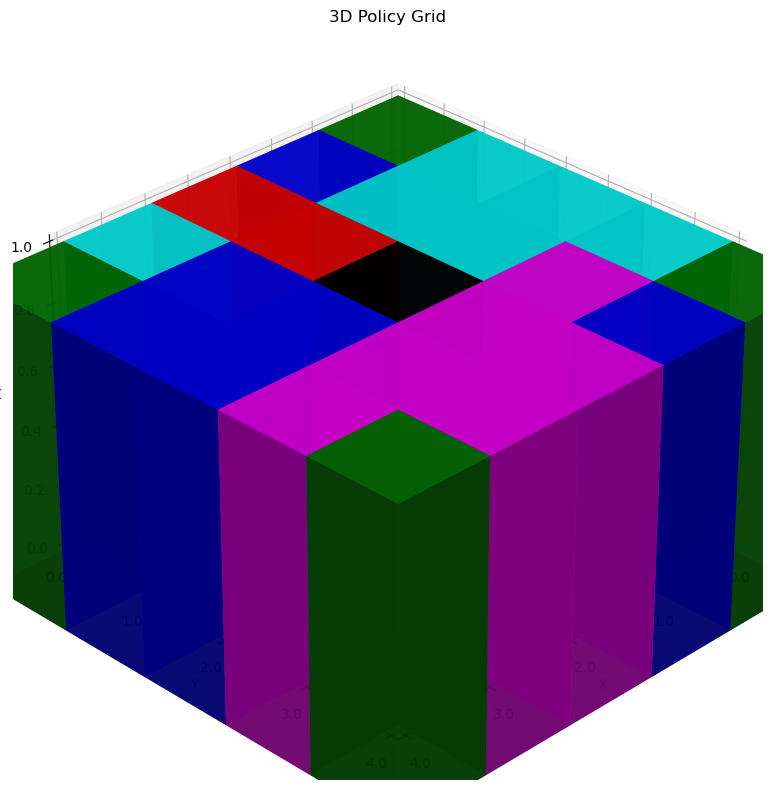

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

policy_grid = [
    ['I', '←', '↓', '→', 'I'],
    ['→', '→', '↓', '←', '←'],
    ['→', '→', 'P', '←', '←'],
    ['→', '↑', '↑', '↑', '↑'],
    ['I', '←', '↑', '↑', 'I']]

# Convert policy grid to 3D array
policy_grid_3d = np.array(policy_grid)

# Create a 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Define positions for each cell in the 3D grid
x, y, z = np.meshgrid(np.arange(len(policy_grid[0])), np.arange(len(policy_grid)), np.arange(1))  # One unit height

# Map symbols to colors
colors = {
    'I': 'green',
    '←': 'blue',
    '↓': 'red',
    '→': 'cyan',
    '↑': 'magenta',
    'P': 'black',
}

# Plot bars for each cell, coloring them based on the symbol
for i in range(len(policy_grid)):
    for j in range(len(policy_grid[0])):
        symbol = policy_grid_3d[i][j]
        color = colors[symbol]
        ax.bar3d(x[i][j], y[i][j], z[i][j], 1, 1, color=color, alpha=0.8, dz=1)  # Added dz argument

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Policy Grid')

# Set limits for the axes
ax.set_xlim(0, len(policy_grid[0]) - 1)
ax.set_ylim(0, len(policy_grid) - 1)
ax.set_zlim(0, 1)  # Set z-axis limit to match bar height

# Rotate the plot for better viewing
ax.view_init(elev=30, azim=45)

# Show the plot
plt.tight_layout()
plt.show()